# Biblioteki

In [1]:
import sklearn; print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.4.0


In [2]:
import sklearn
import pandas as pd
import numpy as np 
from pandas import *
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

import scipy
import scipy.stats as st
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

print(scipy.__version__) #do sprawdzenia wersji tylko pierwsze slowo bez podmodułów
#albo
scipy.version.full_version

C:\Users\Kacper\AppData\Local\Temp\ipykernel_10448\3898324436.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1.12.0


'1.12.0'

# wczytanie danych

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # display.width - Ta opcja ustala szerokość całkowitą wyświetlania wyjścia dla danych Pandas w konsoli. 
# Podając wartość, decydujesz, ile znaków w jednym wierszu może być wyświetlanych. Jest to szczególnie przydatne, gdy chcesz uniknąć zawijania danych 
# do nowej linii w przypadku szerokich ramek danych
pd.set_option('display.expand_frame_repr', True) #nie zastepuje czesci ramki trzema kropkami

In [4]:
df = pd.read_csv("poprawione_dane.csv", low_memory = False)
# Ustawienie low_memory na False oznacza, że pandas nie będzie starał się
# optymalizować zużycia pamięci i spróbuje wczytać cały plik CSV na raz. 
# W przypadku dużych plików CSV, to podejście może prowadzić do większego zużycia pamięci,
# ale jednocześnie może przyspieszyć operację wczytywania,
# ponieważ będą ograniczone dodatkowe operacje odczytu na kawałkach danych.

# EDA & Feature Engineering

In [5]:
#szukamy duplikatow
df.duplicated().any()

True

In [6]:
print(df.columns.tolist())

['created_at_first', 'is_flat', 'is_business', 'description', 'title', 'price', 'city', 'lon_city', 'lat_city', 'lon_district', 'lat_district', 'city_district', 'price[currency]', 'm', 'rooms_num', 'market', 'building_type', 'floor_no', 'building_floors_num', 'building_material', 'windows_type', 'heating', 'build_year', 'construction_status', 'rent', 'rent[currency]', 'building_ownership', 'free_from', 'extras_types_balcony', 'media_types_cable-television', 'media_types_internet', 'media_types_phone', 'security_types_closed_area', 'security_types_roller_shutters', 'equipment_types_dishwasher', 'equipment_types_fridge', 'equipment_types_oven', 'equipment_types_stove', 'equipment_types_washing_machine', 'extras_types_garage', 'extras_types_garden', 'extras_types_terrace', 'extras_types_two_storey', 'extras_types_usable_room', 'security_types_entryphone', 'extras_types_basement', 'extras_types_separate_kitchen', 'terrain_area', 'floors_num', 'garret_type', 'roof_type', 'roofing', 'locatio

In [7]:
for column in df.columns:
    print(column)

created_at_first
is_flat
is_business
description
title
price
city
lon_city
lat_city
lon_district
lat_district
city_district
price[currency]
m
rooms_num
market
building_type
floor_no
building_floors_num
building_material
windows_type
heating
build_year
construction_status
rent
rent[currency]
building_ownership
free_from
extras_types_balcony
media_types_cable-television
media_types_internet
media_types_phone
security_types_closed_area
security_types_roller_shutters
equipment_types_dishwasher
equipment_types_fridge
equipment_types_oven
equipment_types_stove
equipment_types_washing_machine
extras_types_garage
extras_types_garden
extras_types_terrace
extras_types_two_storey
extras_types_usable_room
security_types_entryphone
extras_types_basement
extras_types_separate_kitchen
terrain_area
floors_num
garret_type
roof_type
roofing
location
recreational
security_types_alarm
security_types_anti_burglary_door
security_types_monitoring
fence_types_wire
heating_types_coal
media_types_cesspool
media

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832011 entries, 0 to 832010
Columns: 111 entries, created_at_first to created_at_first_month
dtypes: bool(74), float64(11), int64(7), object(19)
memory usage: 293.6+ MB


In [9]:
missing_values = df.isnull().sum()

print(missing_values)

created_at_first                          0
is_flat                                   0
is_business                               0
description                               0
title                                     0
price                                     0
city                                      0
lon_city                                  0
lat_city                                  0
lon_district                              0
lat_district                              0
city_district                             0
price[currency]                           0
m                                         0
rooms_num                               268
market                                    6
building_type                        164932
floor_no                             198164
building_floors_num                  234603
building_material                    425259
windows_type                         286393
heating                              427965
build_year                      

In [10]:
df.dtypes

created_at_first                      object
is_flat                                int64
is_business                            int64
description                            int64
title                                  int64
price                                  int64
city                                  object
lon_city                             float64
lat_city                             float64
lon_district                         float64
lat_district                         float64
city_district                         object
price[currency]                         bool
m                                    float64
rooms_num                             object
market                                object
building_type                         object
floor_no                              object
building_floors_num                  float64
building_material                     object
windows_type                          object
heating                               object
build_year

In [11]:
df.head(10)

,created_at_first,is_flat,is_business,description,title,price,city,lon_city,lat_city,lon_district,lat_district,city_district,price[currency],m,rooms_num,market,building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,rent[currency],building_ownership,free_from,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,terrain_area,floors_num,garret_type,roof_type,roofing,location,recreational,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,is_bungalow,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month
0,2018-10-06 12:20:48,1,1,1693,50,389556,Olsztyn,20.47703,53.77602,20.42342,53.76516,OlsztynDajtki,True,72.14,4,secondary,NaN,floor_1,1.0,NaN,plastic,NaN,2018.0,NaN,NaN,PLN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,10
1,2019-02-18 12:17:51,1,1,1743,43,500000,Plewiska,16.81106,52.36473,0.00000,0.00000,Plewiska,True,95.00,4,secondary,ribbon,ground_floor,1.0,brick,plastic,gas,2014.0,ready_to_use,NaN,PLN,full_ownership,NaN,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,2
2,2019-03-21 17:31:09,1,1,1345,42,238000,Białystok,23.16996,53.12988,23.10333,53.12194,BiałystokZielone Wzgórza,True,58.90,3,secondary,block,floor_3,4.0,concrete_plate,wooden,urban,1986.0,to_renovation,430.0,PLN,full_ownership,NaN,True,True,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [12]:
#pytanie czy usuwamy koluny z miastami i dzielnicami czy przeksztalcamy jakos i zostawiamy

# df without last row (all NaN) and columns  with
#strings like 'created_at_first' and 'city', 'city_district'
#robie model bazujacy na wspolrzednych a nazwy dzielnic i miast wyrzuce
df = df.iloc[:-1].drop(['created_at_first', 'city', 'city_district', 'free_from'], axis=1)

df.tail()

,is_flat,is_business,description,title,price,lon_city,lat_city,lon_district,lat_district,price[currency],m,rooms_num,market,building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,rent[currency],building_ownership,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,terrain_area,floors_num,garret_type,roof_type,roofing,location,recreational,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,is_bungalow,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month
832005,0,1,1445,41,1250000,21.06474,52.08422,0.00000,0.00000,True,240.00,5,secondary,detached,NaN,NaN,brick,plastic,NaN,1986.0,ready_to_use,NaN,NaN,NaN,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1000.0,one_floor,NaN,NaN,NaN,NaN,NaN,True,False,True,False,False,False,True,True,True,False,False,False,0.0,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,2
832006,1,1,1278,3,218948,20.06512,49.98608,0.00000,0.00000,True,39.45,2,primary,block,ground_floor,3.0,brick,plastic,NaN,2018.0,NaN,NaN,PLN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,9
832007,1,1,1052,33,600000,18.57300,54.44150,18.54947,54.45831,True,48.00,3,secondary,block,floor_8,10.0,NaN,NaN,urban,1975.0,ready_to_use,NaN,PLN,full_ownership,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,3
832008,1,1,1898,50,259532,18.77438,50.30255,18.78572,50.32493,True,56.42,3,primary,apartme

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unikalne wartości w kolumnie {column}: {unique_values}")

Unikalne wartości w kolumnie rooms_num: ['4' '3' '2' '6' '5' '10' '9' '7' '1' 'more' '8' nan]
Unikalne wartości w kolumnie market: ['secondary' 'primary' nan]
Unikalne wartości w kolumnie building_type: [nan 'ribbon' 'block' 'detached' 'apartment' 'semi_detached' 'tenement'
 'residence' 'house' 'infill' 'farm' 'loft' 'tenement_house' 'separate']
Unikalne wartości w kolumnie floor_no: ['floor_1' 'ground_floor' 'floor_3' nan 'floor_2' 'floor_4' 'floor_8'
 'floor_9' 'floor_7' 'floor_5' 'floor_6' 'floor_10' 'floor_higher_10'
 'garret' 'cellar']
Unikalne wartości w kolumnie building_material: [nan 'brick' 'concrete_plate' 'breezeblock' 'cellular_concrete' 'other'
 'wood' 'silikat' 'reinforced_concrete' 'hydroton' 'concrete']
Unikalne wartości w kolumnie windows_type: ['plastic' 'wooden' nan 'notany' 'aluminium']
Unikalne wartości w kolumnie heating: [nan 'gas' 'urban' 'other' 'boiler_room' 'electrical' 'tiled_stove']
Unikalne wartości w kolumnie construction_status: [nan 'ready_to_use' 'to_

### Rozdzielenie na mieszkania i domy


In [14]:
# Definicja funkcji mapującej typ budynku na typ nieruchomości
def map_building_to_property_type(building_type):
    # mieszkania
    #tenement - kamienica
    apartments = ['apartment', 'block', 'tenement', 'tenement_house']
    # domy
    # detached - wolnostajacy, semi_detached - blizniak
    houses = ['detached', 'semi_detached', 'house', 'farm', 'residence']
    
    if building_type in apartments:
        return 'apartment'
    elif building_type in houses:
        return 'house'
    else:
        return 'unknown'  

# mapujemy za pomcoa funkcji
df['property_type'] = df['building_type'].map(map_building_to_property_type)

# wyswietlamy
print(df[['building_type', 'property_type']].head())
df.drop(['building_type'], axis=1, inplace=True)

  building_type property_type
0           NaN       unknown
1        ribbon       unknown
2         block     apartment
3           NaN       unknown
4      detached         house


In [15]:
#chodzi o to zeby zmienic floor_no a nastepnie robic to na dwie kolumny
def transform_floor_column(row):
    if pd.isnull(row):
        return np.nan, np.nan #zwracamy po dwie rzeczy zawsze bo potem rozbijamy na dwie kolumny
    elif row == 'ground_floor':
        return 0, np.nan
    elif row == 'garret':
        return np.nan, 1
    elif row == 'cellar':
        return np.nan, 0
    elif row == 'floor_higher_10':
        return 11, np.nan
    else:
        return int(row.split('_')[1]), np.nan

df['floor'], df['garret_cellar'] = zip(*df['floor_no'].map(transform_floor_column))
#garet - poddasze
#cellar - piwnica
# Kodowanie one-hot dla kolumny 'garret_cellar'
df = pd.concat([df, pd.get_dummies(df['garret_cellar'], prefix='type', dummy_na=True)], axis=1).drop(['garret_cellar'], axis=1)
#ogolnie nie weim czy floors_num to nie nr pietra w bloku a floor_nu to liczba pieter domu ale ogolnie do ogarniecia
# Wynik
df.drop(['floors_num', 'floor_no'], axis=1, inplace=True)


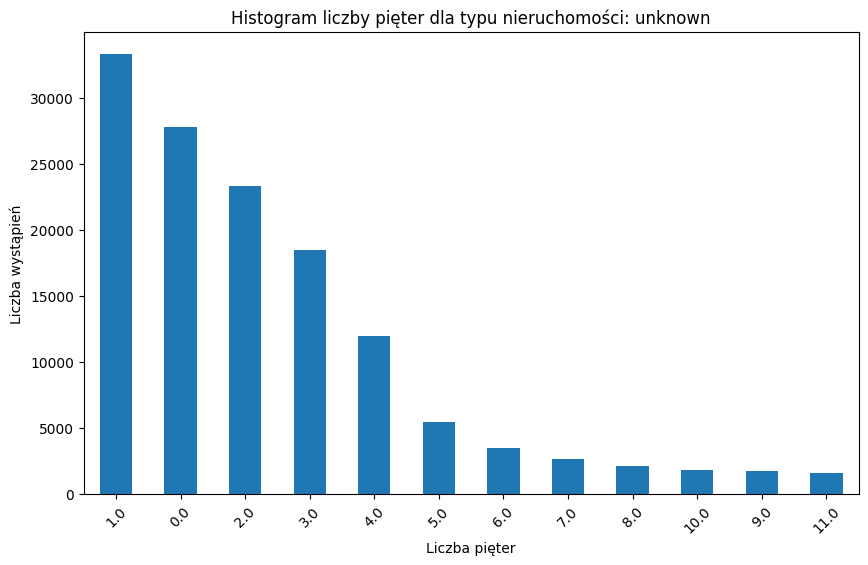

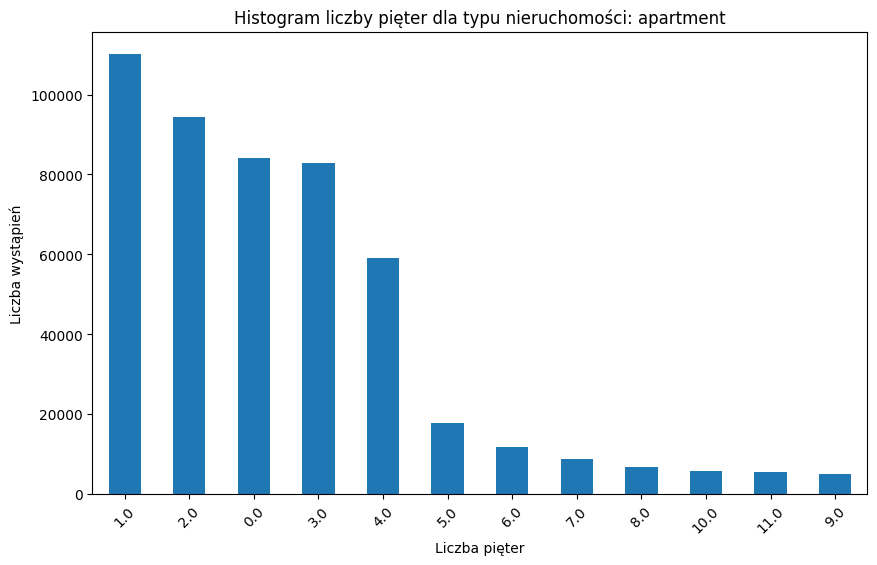

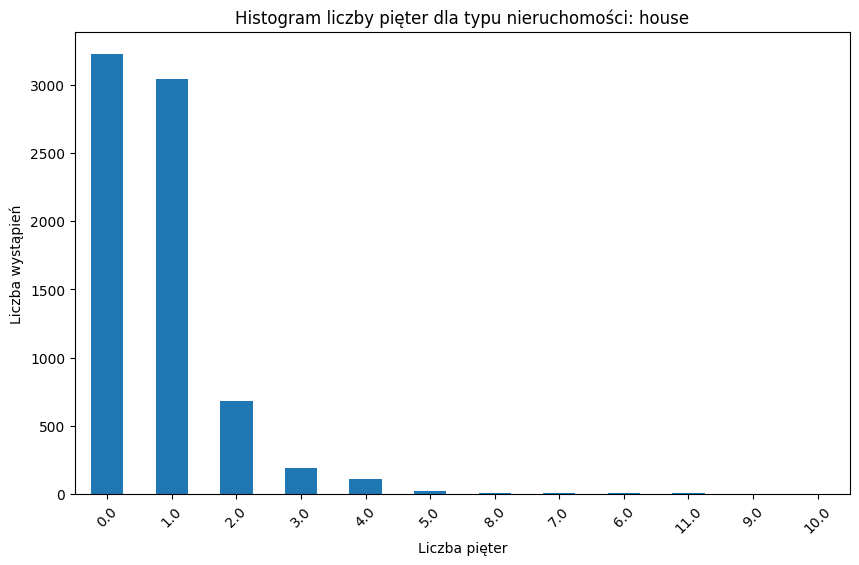

In [16]:
for property_type in df['property_type'].unique():
    # Filtrujemy DataFrame do konkretnego typu nieruchomości
    subset = df[df['property_type'] == property_type]
    # Liczymy wystąpienia każdej wartości w 'floors_num'
    counts = subset['floor'].value_counts()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Histogram liczby pięter dla typu nieruchomości: {property_type}')
    plt.xlabel('Liczba pięter')
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=45)  # Obracamy etykiety, aby były czytelniejsze
    plt.show()
    
    

Jest znacznie mniej pięter dla domów niż mieszkań co by się niby zgadzało

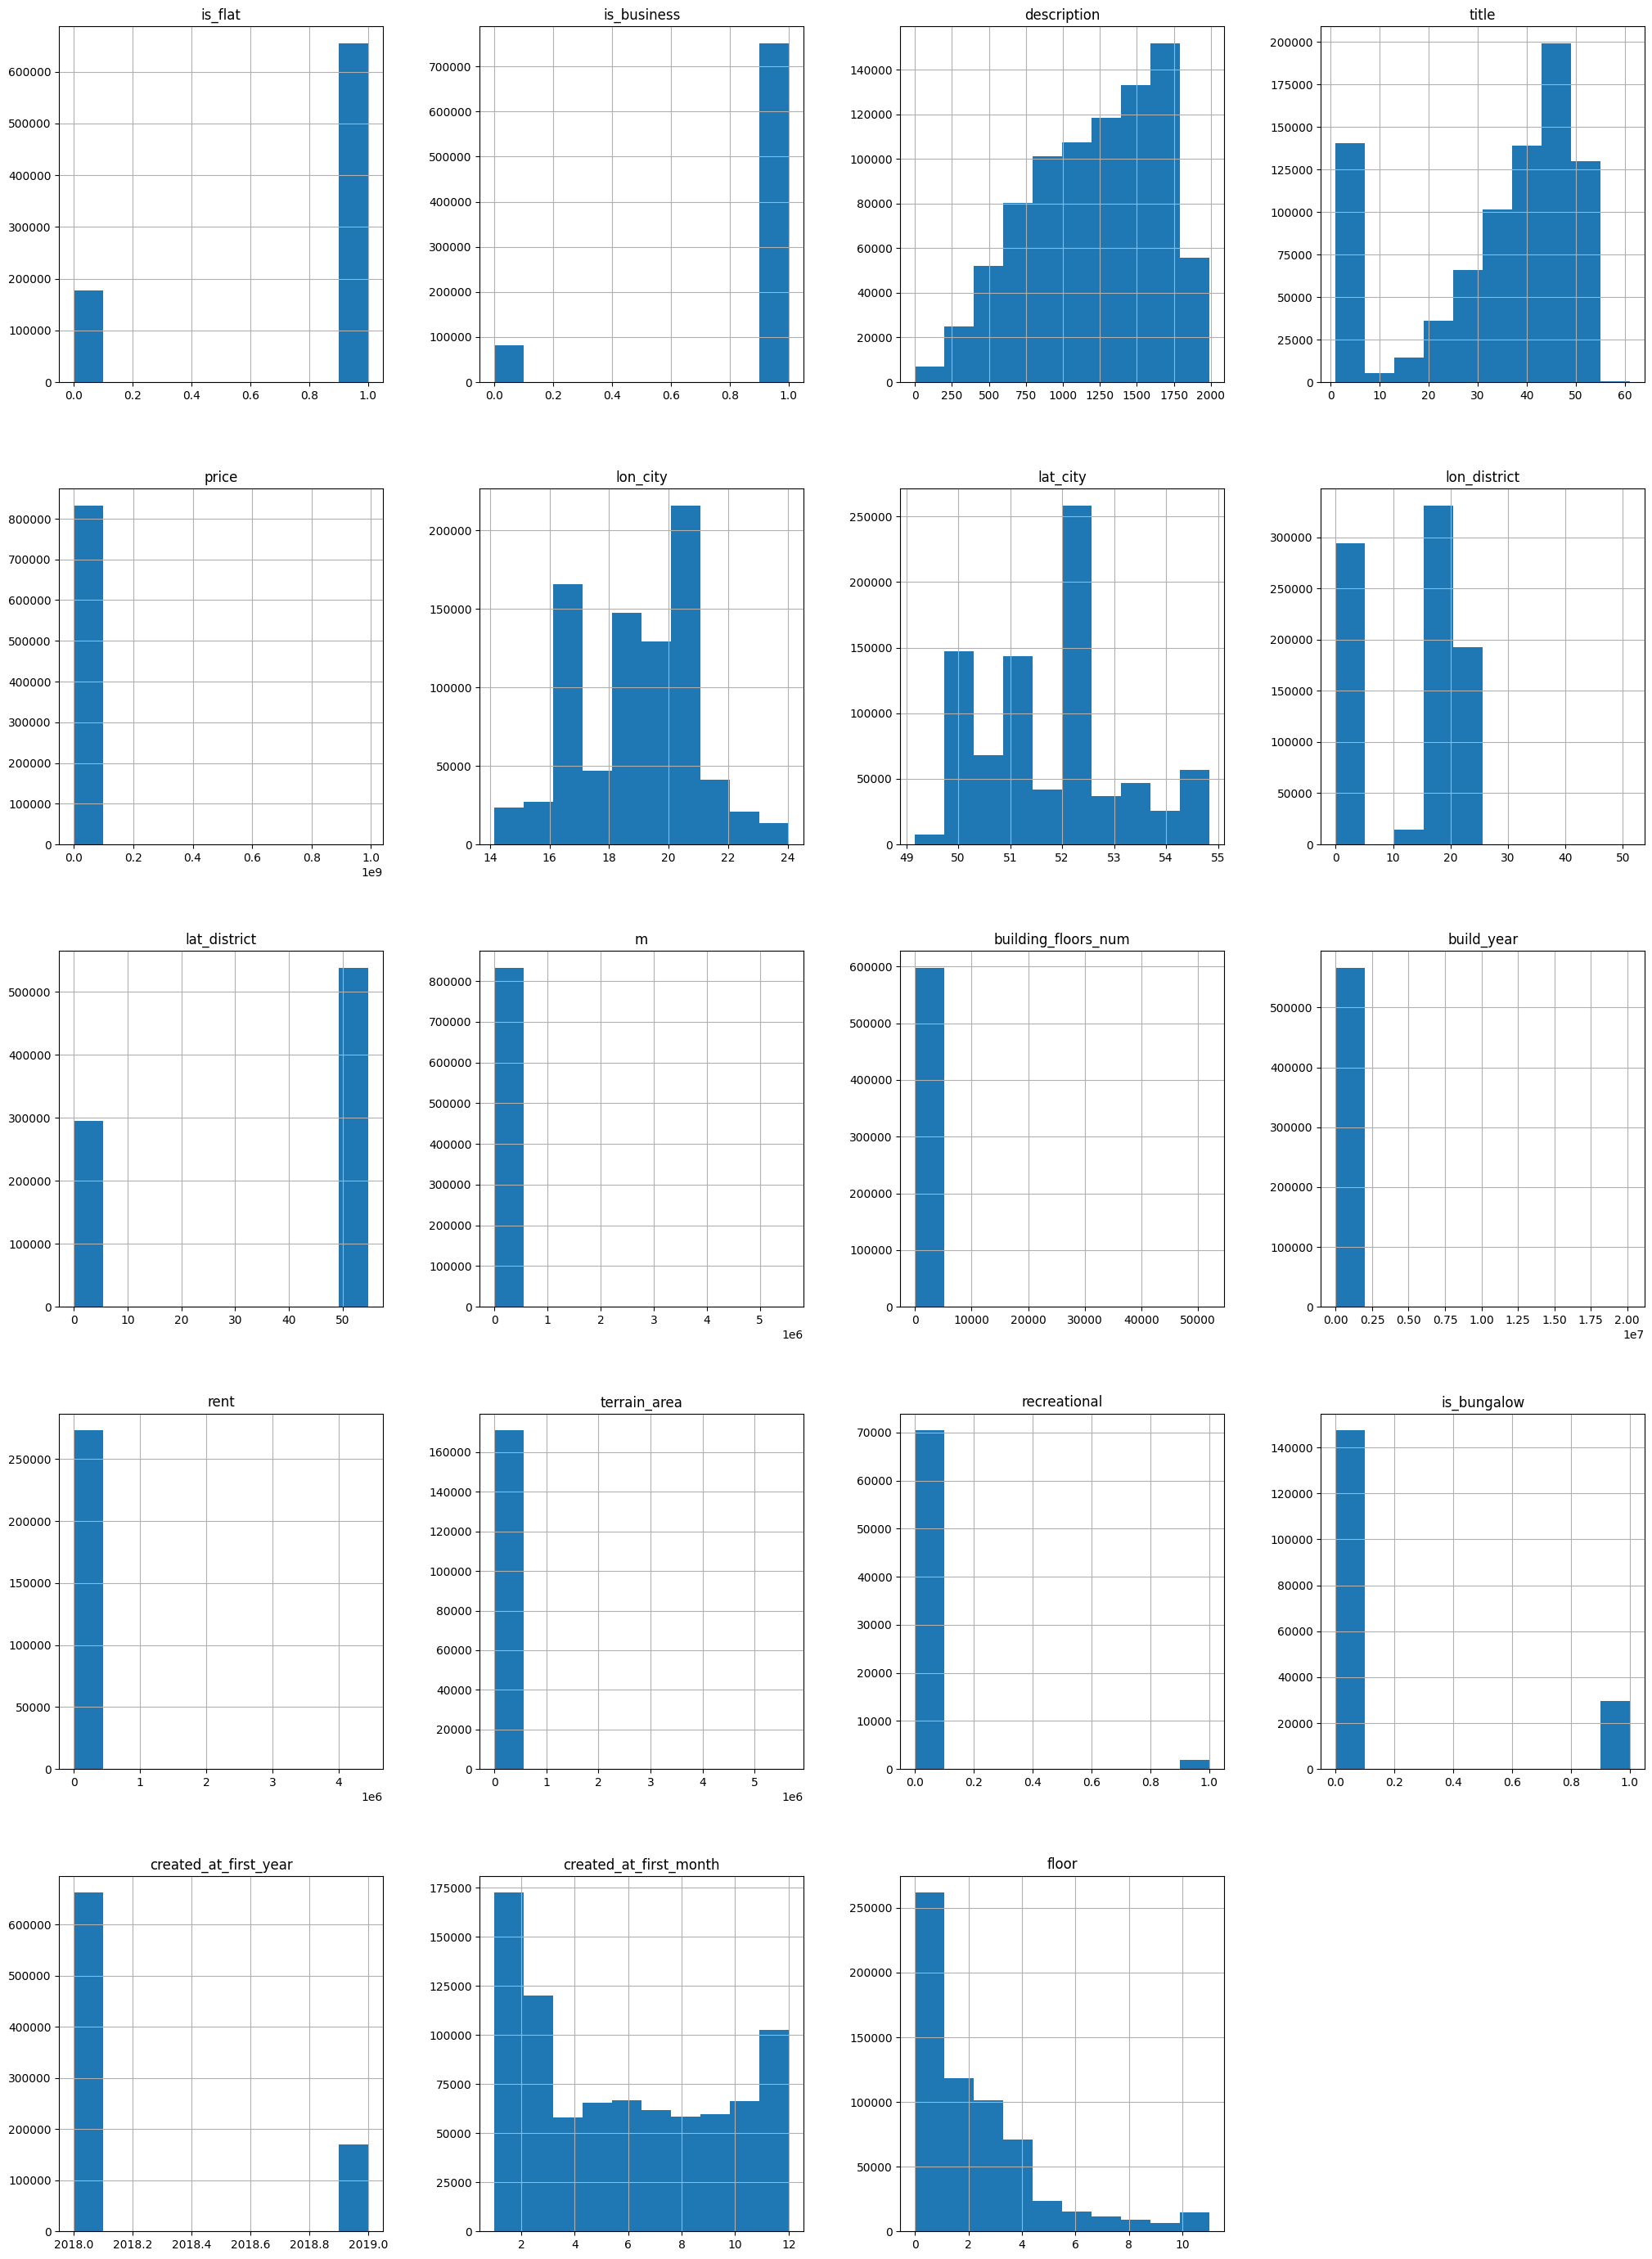

In [17]:
df.hist(figsize=(25,35))

plt.show()

In [ ]:
#cos nie tak z histogramem kolumny 'm', 'building_floors_num' oraz'build_year'

In [18]:
def custom_get_dummies(df, exclude_columns=None):
    """
    Funkcja tworzy zmienne dummy dla kolumn kategorycznych DataFrame, z wyjątkiem tych wymienionych w exclude_columns.

    """
    if exclude_columns is None:
        exclude_columns = []
    

    columns_to_dummies = [col for col in df.columns if df[col].dtype == 'object' and col not in exclude_columns]
    
    df_dummies = pd.get_dummies(df, columns=columns_to_dummies, dummy_na=True)
    
    return df_dummies

#df['property']=df['property_type'].copy()
df = custom_get_dummies(df, exclude_columns=['floor_no', 'floors_num', 'rooms_num', 'property_type'])

# Podgląd wyniku
df.head()



,is_flat,is_business,description,title,price,lon_city,lat_city,lon_district,lat_district,price[currency],m,rooms_num,building_floors_num,build_year,rent,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,terrain_area,recreational,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,is_bungalow,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month,property_type,floor,type_0.0,type_1.0,type_nan,market_primary,market_secondary,market_nan,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,building_material_wood,building_material_nan,windows_type_aluminium,windows_type_notany,windows_type_plastic,windows_type_wooden,windows_type_nan,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,heating_nan,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,construction_status_unfinished_close,construction_status_unfinished_open,construction_status_nan,rent[currency]_EUR,rent[currency]_GBP,rent[currency]_PLN,rent[currency]_USD,rent[currency]_nan,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_ownership_nan,garret_type_notany,garret_type_unusable,garret_type_usable,garret_type_nan,roof_type_diagonal,roof_type_flat,roof_type_notany,roof_type_nan,roofing_asbestic_tile,roofing_chopper,roofing_other,roofing_roofing_paper,roofing_sheet,roofing_shingle,roofing_slate,roofing_tile,roofing_nan,location_city,location_country,location_suburban,location_nan
0,1,1,1693,50,389556,20.47703,53.77602,20.42342,53.76516,True,72.14,4,1.0,2018.0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,10,unknown,1.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,Fals

In [19]:
df['floor'].head()

0    1.0
1    0.0
2    3.0
3    0.0
4    NaN
Name: floor, dtype: float64

In [20]:
df.rooms_num=to_numeric(df["rooms_num"].replace("more", "11"))
# Podobno Scikit-Learn akceptuje boolowskie wartosci, ale i tak zamienie 


In [21]:
#model akceptuje False i True ale zamieniam 
df.replace({False: 0, True: 1}, inplace=True)
#trwa prawie min

C:\Users\Kacper\AppData\Local\Temp\ipykernel_10448\1352390531.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


In [22]:
df.head()

,is_flat,is_business,description,title,price,lon_city,lat_city,lon_district,lat_district,price[currency],m,rooms_num,building_floors_num,build_year,rent,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,terrain_area,recreational,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,is_bungalow,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month,property_type,floor,type_0.0,type_1.0,type_nan,market_primary,market_secondary,market_nan,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,building_material_wood,building_material_nan,windows_type_aluminium,windows_type_notany,windows_type_plastic,windows_type_wooden,windows_type_nan,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,heating_nan,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,construction_status_unfinished_close,construction_status_unfinished_open,construction_status_nan,rent[currency]_EUR,rent[currency]_GBP,rent[currency]_PLN,rent[currency]_USD,rent[currency]_nan,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_ownership_nan,garret_type_notany,garret_type_unusable,garret_type_usable,garret_type_nan,roof_type_diagonal,roof_type_flat,roof_type_notany,roof_type_nan,roofing_asbestic_tile,roofing_chopper,roofing_other,roofing_roofing_paper,roofing_sheet,roofing_shingle,roofing_slate,roofing_tile,roofing_nan,location_city,location_country,location_suburban,location_nan
0,1,1,1693,50,389556,20.47703,53.77602,20.42342,53.76516,1,72.14,4.0,1.0,2018.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,10,unknown,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,1743,43,500000,16.81106,52.36473,0.00000,0.00000,1,95.00,4.0,1.0,2014.0,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,unknown,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1

In [23]:
df.shape

(832010, 161)

In [24]:
df.describe().round(2)

,is_flat,is_business,description,title,price,lon_city,lat_city,lon_district,lat_district,price[currency],m,rooms_num,building_floors_num,build_year,rent,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,terrain_area,recreational,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,is_bungalow,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month,floor,type_0.0,type_1.0,type_nan,market_primary,market_secondary,market_nan,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,building_material_wood,building_material_nan,windows_type_aluminium,windows_type_notany,windows_type_plastic,windows_type_wooden,windows_type_nan,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,heating_nan,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,construction_status_unfinished_close,construction_status_unfinished_open,construction_status_nan,rent[currency]_EUR,rent[currency]_GBP,rent[currency]_PLN,rent[currency]_USD,rent[currency]_nan,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_ownership_nan,garret_type_notany,garret_type_unusable,garret_type_usable,garret_type_nan,roof_type_diagonal,roof_type_flat,roof_type_notany,roof_type_nan,roofing_asbestic_tile,roofing_chopper,roofing_other,roofing_roofing_paper,roofing_sheet,roofing_shingle,roofing_slate,roofing_tile,roofing_nan,location_city,location_country,location_suburban,location_nan
count,832010.00,832010.0,832010.00,832010.00,8.320100e+05,832010.00,832010.00,832010.00,832010.00,832010.0,832010.00,831742.00,597407.00,566003.00,273118.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,171009.00,72406.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,177185.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,832010.00,

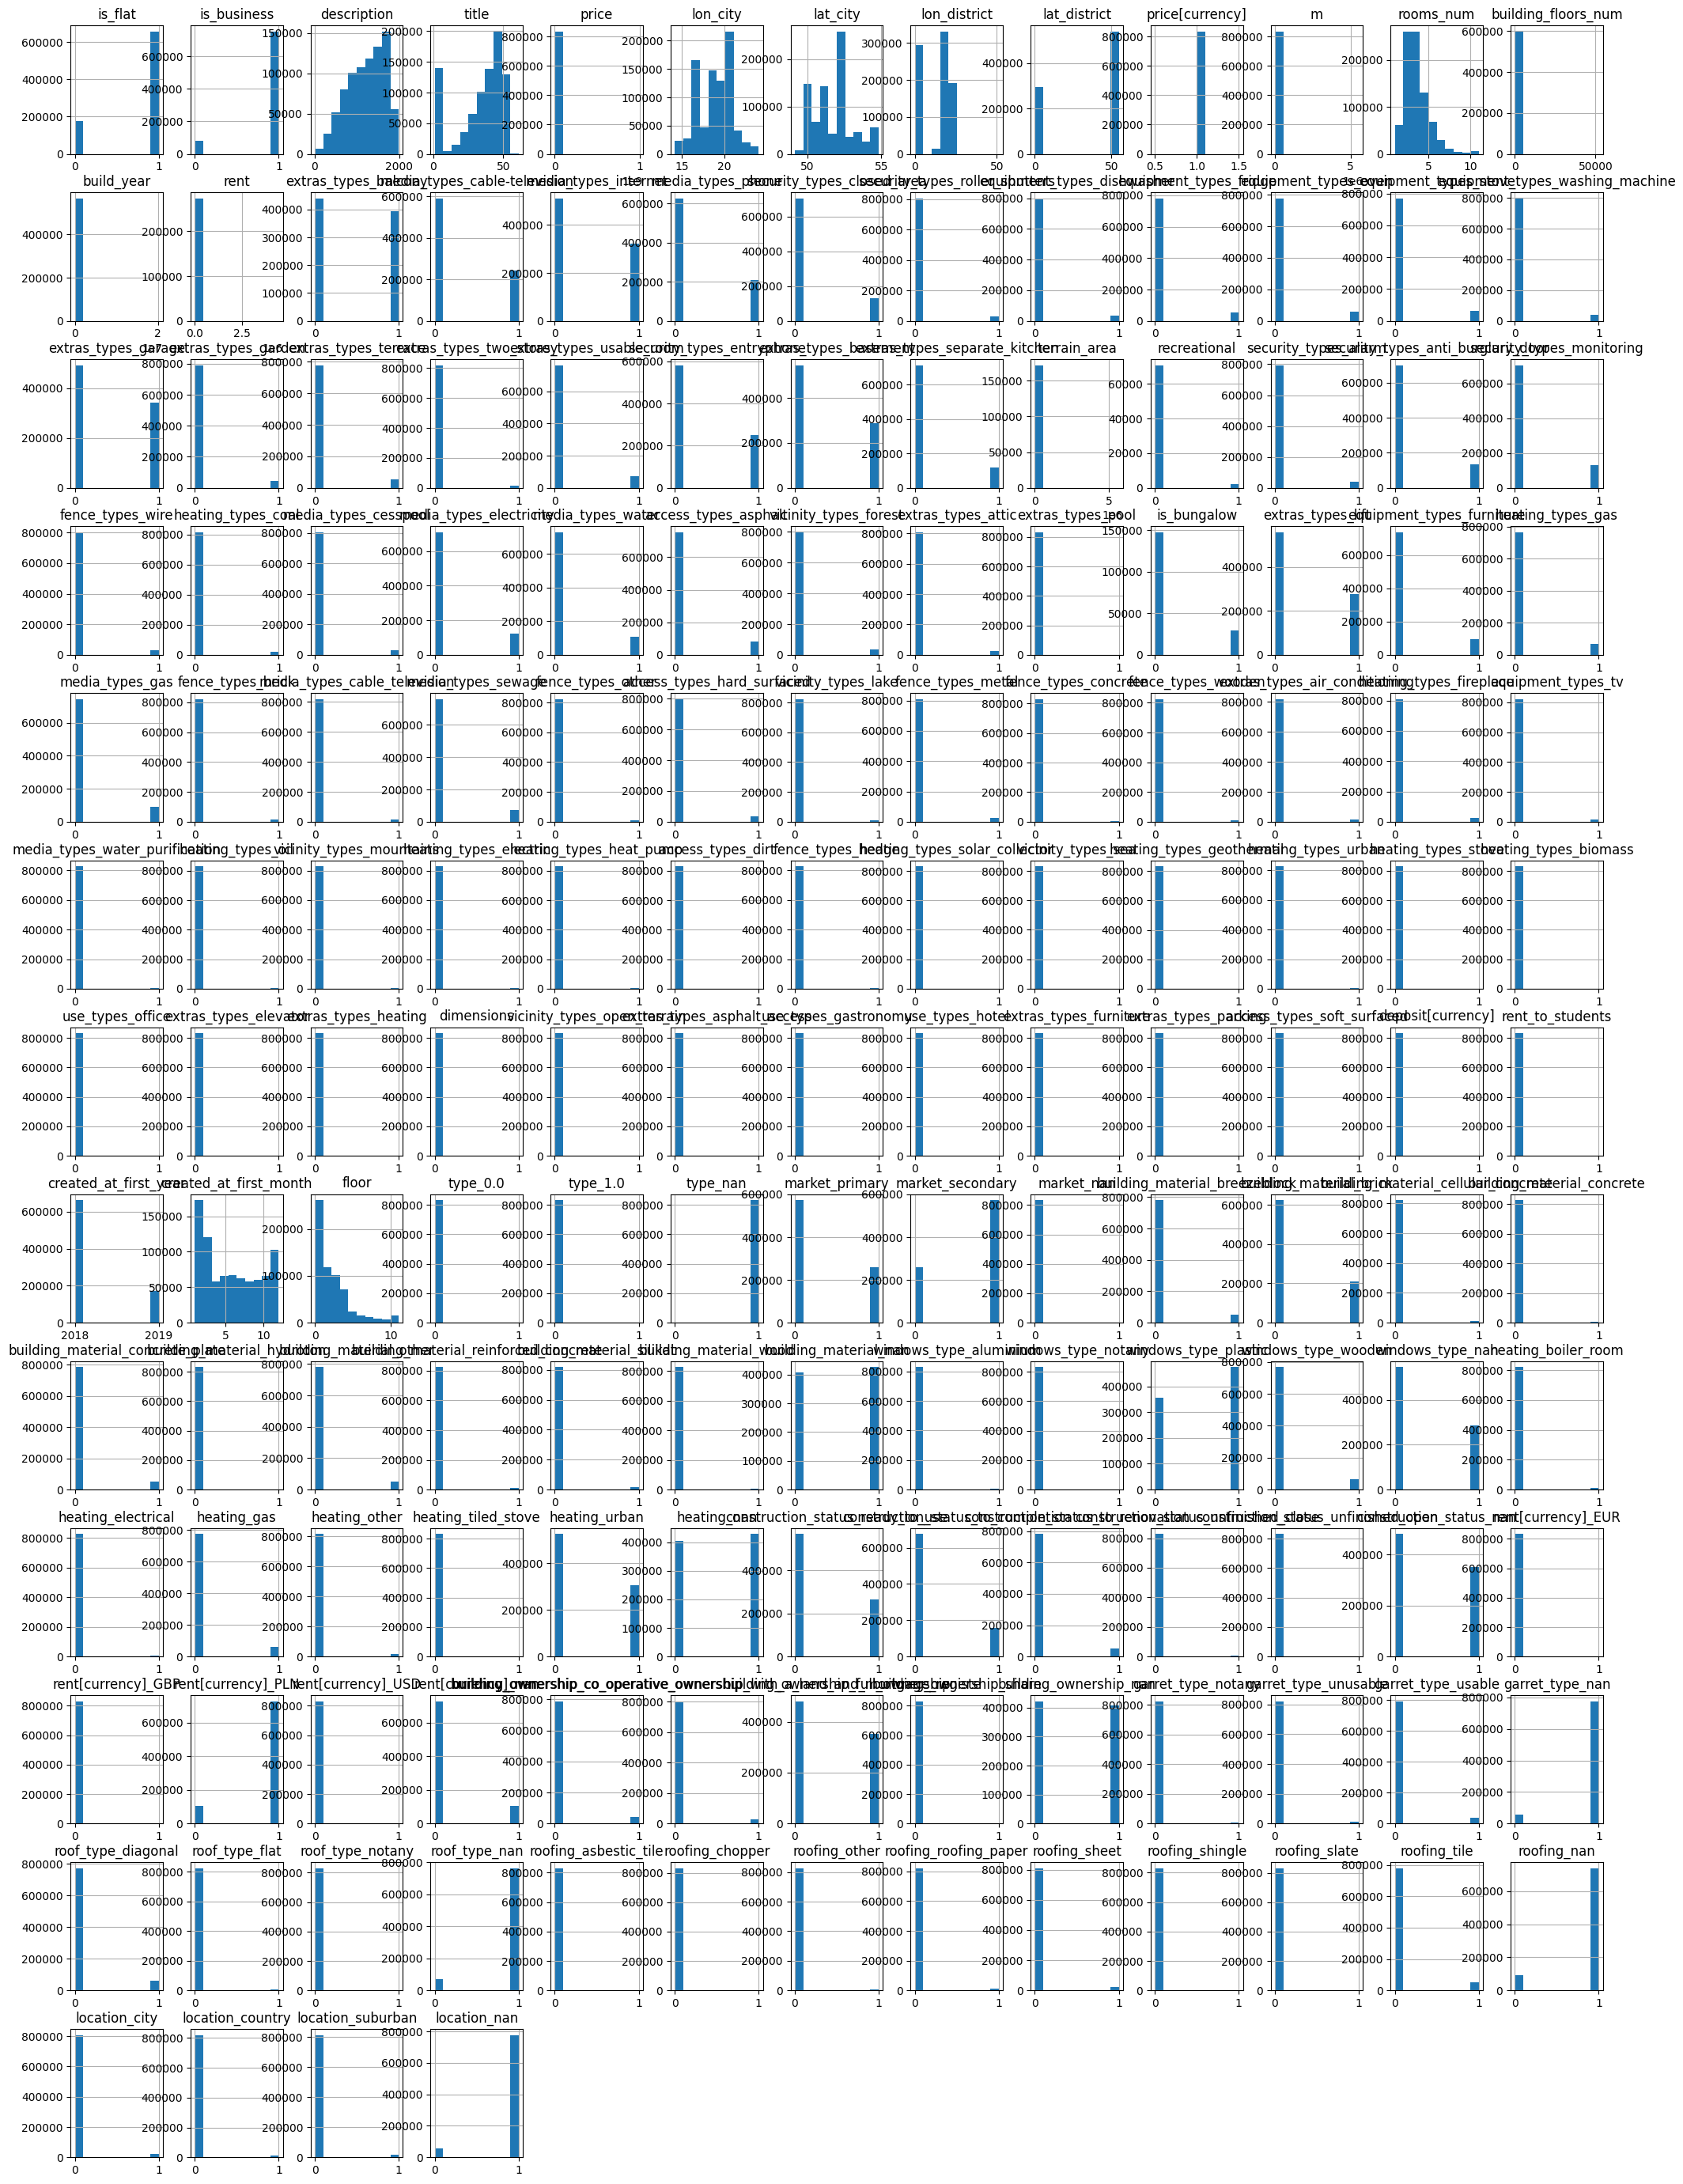

In [25]:
df.hist(figsize=(25,35))

plt.show() #bierze pod uwage tylko float oraz int (boolean nie)

In [26]:
#print(scipy.stats.shapiro(df.description)) #shapiro nie nadaje sie do duzych prob

- Dla 'sqrt - 2' w obu kolumnach statystyka dla title zmniejsza sie a dla descirption na odwrot
- Dla 'boxcox- 3' w obu kolumnach statystyka zwiększa się więc mniej podobny do rozkładu normalnego.
Bez względu na zmniejszanie/zwiększanie się statystyki nie zmienia to nic p-value.

C:\Users\Kacper\AppData\Local\Temp\ipykernel_10448\4236843610.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[112.54694139  92.78589537  90.03020745 ...  66.0654706  112.54694139
 103.9796245 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  draft[draft > 0] = transformed_data  # Aktualizujemy tylko wartości dodatnie


Przed zmianą - Statistics=104010.095051210, p=0.000000000
Po zmianie - Statistics=126503.652256194, p=0.000000000


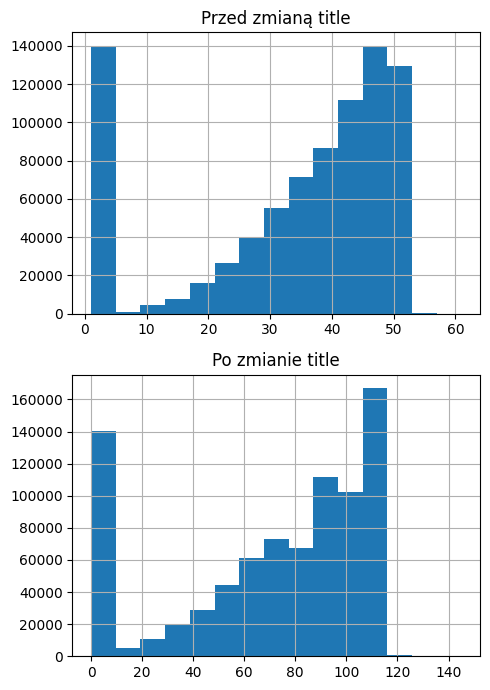

C:\Users\Kacper\AppData\Local\Temp\ipykernel_10448\4236843610.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 9536.30151378  9893.71495659  7129.27735273 ...  5225.71454446
 11018.72268539  5294.88964372]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  draft[draft > 0] = transformed_data  # Aktualizujemy tylko wartości dodatnie


Przed zmianą - Statistics=92533.009007186, p=0.000000000
Po zmianie - Statistics=226772.865096212, p=0.000000000


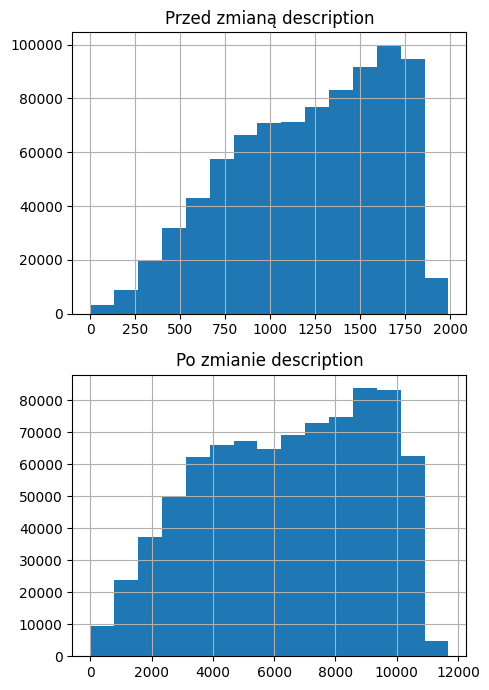

In [27]:
from scipy.stats.mstats import normaltest  # D'Agostino K^2 Test
from scipy.stats import boxcox
import scipy.stats as stats

def normalisation(column, what_transformation, nazwa_col):
    draft = column.copy()  # Kopiujemy kolumnę do lokalnej zmiennej 'draft'
    if what_transformation == 1:
        draft = np.log(draft[draft > 0])  # Logarytmujemy wartości dodatnie
    elif what_transformation == 2:
        draft = np.sqrt(draft) 
    elif what_transformation == 3:
        # Boxcox wymaga tylko wartości dodatnich, najpierw filtrujemy te wartości.
        positive_values = draft[draft > 0]
        transformed_data, _ = boxcox(positive_values)  #Box-Cox
        draft[draft > 0] = transformed_data  # Aktualizujemy tylko wartości dodatnie
    elif what_transformation == 4:
        draft = draft ** 2  # Podnosimy wartości do kwadratu

    # Test normalności przed przekształceniem
    stat, p = normaltest(column.dropna())  # Usuwamy NaN przed testem
    print(f'Przed zmianą - Statistics={stat:.9f}, p={p:.9f}')
    
    # Test normalności po przekształceniu
    stat, p = normaltest(draft.dropna())  # Ponownie usuwamy NaN
    print(f'Po zmianie - Statistics={stat:.9f}, p={p:.9f}')
    
    # Rysowanie histogramów przed i po przekształceniu
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))
    column.hist(ax=axes[0], bins=15)
    axes[0].set_title(f'Przed zmianą {nazwa_col}')
    draft.hist(ax=axes[1], bins=15)
    axes[1].set_title(f'Po zmianie {nazwa_col}')
    plt.tight_layout()
    plt.show()


normalisation(df['title'], 3, 'title')
normalisation(df['description'], 3, 'description')


Nie udało się uzyskać pożądanego efektu, zostawiam.

In [28]:
df.describe().round(2)['lat_city']

count    832010.00
mean         51.78
std           1.28
min          49.17
25%          50.78
50%          52.08
75%          52.39
max          54.83
Name: lat_city, dtype: float64

<Figure size 1500x800 with 0 Axes>

C:\Users\Kacper\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


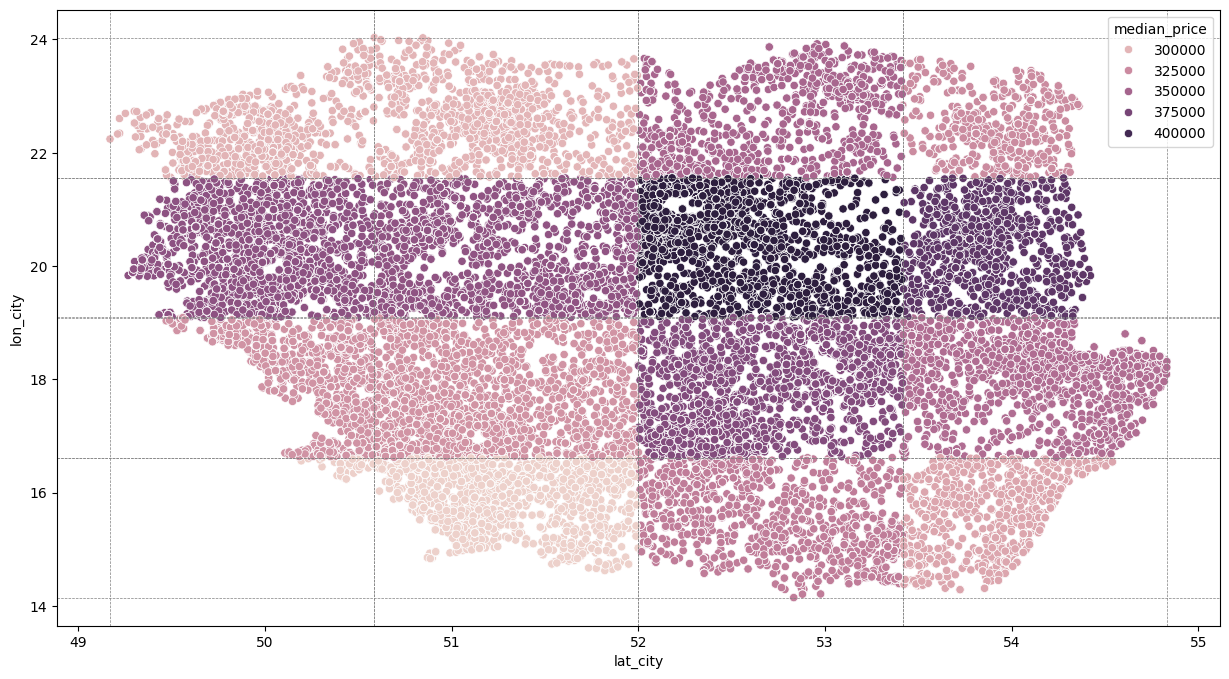

In [29]:
from statistics import median # albo numpy.median np.median() albo transform('median')

plt.figure(figsize=(15, 8))

num_bins = 4 #4x4 to bedzie teoretyczne 16 wojewodztw
df['lat_bin'] = pd.cut(df['lat_city'], bins=num_bins, labels=False)
df['lon_bin'] = pd.cut(df['lon_city'], bins=num_bins, labels=False)

# Obliczanie mediany dla każdego obszaru
median_price_by_lat_bin = df.groupby('lat_bin')['price'].transform('median')
median_price_by_lon_bin = df.groupby('lon_bin')['price'].transform('median')

df['median_price'] = (median_price_by_lat_bin + median_price_by_lon_bin) / 2

plt.figure(figsize=(15, 8))
sns.scatterplot(x="lat_city", y="lon_city", data=df, hue='median_price')
# Dodawanie linii granicznych
for i in range(num_bins):
    plt.axvline(df[df['lat_bin'] == i]['lat_city'].min(), color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(df[df['lat_bin'] == i]['lat_city'].max(), color='gray', linestyle='--', linewidth=0.5)
    plt.axhline(df[df['lon_bin'] == i]['lon_city'].min(), color='gray', linestyle='--', linewidth=0.5)
    plt.axhline(df[df['lon_bin'] == i]['lon_city'].max(), color='gray', linestyle='--', linewidth=0.5)

plt.show()

Mediana cen mieszkań w województwie mazowieckim jest największa.

In [30]:
df=df.drop(columns=["median_price"])

In [31]:
df.to_csv('poprawione_dane_v2.csv', index = False)

In [32]:
    for kolumna in df.columns:
        liczba_nan = df[kolumna].isna().sum()
        print(f"{kolumna}: {liczba_nan}")

is_flat: 0
is_business: 0
description: 0
title: 0
price: 0
lon_city: 0
lat_city: 0
lon_district: 0
lat_district: 0
price[currency]: 0
m: 0
rooms_num: 268
building_floors_num: 234603
build_year: 266007
rent: 558892
extras_types_balcony: 0
media_types_cable-television: 0
media_types_internet: 0
media_types_phone: 0
security_types_closed_area: 0
security_types_roller_shutters: 0
equipment_types_dishwasher: 0
equipment_types_fridge: 0
equipment_types_oven: 0
equipment_types_stove: 0
equipment_types_washing_machine: 0
extras_types_garage: 0
extras_types_garden: 0
extras_types_terrace: 0
extras_types_two_storey: 0
extras_types_usable_room: 0
security_types_entryphone: 0
extras_types_basement: 0
extras_types_separate_kitchen: 0
terrain_area: 661001
recreational: 759604
security_types_alarm: 0
security_types_anti_burglary_door: 0
security_types_monitoring: 0
fence_types_wire: 0
heating_types_coal: 0
media_types_cesspool: 0
media_types_electricity: 0
media_types_water: 0
access_types_asphalt: 0

w 4 kolumnach sa nany, wczesniej bylo wiecej ale zostaly rozlozone za pomoca get_dummies tworzac rowniez kolumnie z True gdy jest NaN dummy_na=True